**Problem Definition**

Convert the Sign Alphabet to Text

**Data**

[Dataset](https://www.kaggle.com/datasets/datamunge/sign-language-mnist)

1. No cases for the letters J & Z (Reason: J & Z require motion)
2. GrayScale Images
3. Pixel Values Range From 0 to 255
4. Each image contains 784 Pixels


**Evaluation**

Accuracy

**Modelling**

CNN

# Initial End-to-End Workflow (Start)

In [1]:
# Importing required libraries

from sklearn.preprocessing import LabelBinarizer
from tensorflow import keras
from keras.utils import plot_model

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
# loading the training data (X+y)
train_df = pd.read_csv('data/alphabet/sign_mnist_train.csv')

In [3]:
train_df = train_df.sample(frac=1, random_state=42) # Shuffiling the entire dataset

In [4]:
X, y = train_df.drop('label', axis=1), train_df['label'] # Split the dataset into X, y

In [5]:
X.shape, y.shape

((27455, 784), (27455,))

In [6]:
np.unique(X.dtypes), y.dtype

(array([dtype('int64')], dtype=object), dtype('int64'))

In [7]:
label_binarizer = LabelBinarizer() # Binarize labels in a one-vs-all fashion (return one-hot encoded vectors)
y = label_binarizer.fit_transform(y)

In [8]:
X = X/255.0 # Normalizing the training data and converting the data type to float

In [9]:
np.unique(X.dtypes)

array([dtype('float64')], dtype=object)

In [10]:
# Converting the 1-D array of 784 pixels to (28, 28, 1) Image
# (28, 28) represents the spatial dimensions of the image & 1 specifies that the image is grayscale
X = tf.reshape(X, [-1, 28, 28, 1])

In [11]:
X.shape, y.shape

(TensorShape([27455, 28, 28, 1]), (27455, 24))

In [12]:
# Generating a validation set

X_train, X_valid = X[:25000], X[25000:]
y_train, y_valid = y[:25000], y[25000:]

In [13]:
X_train[0].dtype

tf.float64

In [14]:
X_train[0].shape

TensorShape([28, 28, 1])

(<matplotlib.image.AxesImage at 0x28a45e510>,
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1]))

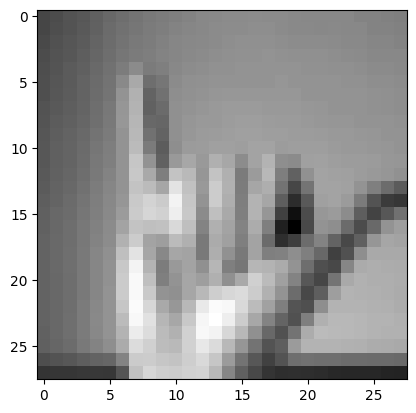

In [15]:
plt.imshow(X[0], cmap='gray'), y[0]

In [16]:
# Defining the CNN

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(24, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 128)         0

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
save_best_cb = keras.callbacks.ModelCheckpoint('models/initial-end-to-end', save_best_only=True) # Saves the best model so far
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5) # Interupts training when there is no progress

In [20]:
# The model is same is 'models/initial-end-to-end'
# The history object is 'models/initial-end-to-end-history'

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])

Epoch 1/20
781/782 [============================>.] - ETA: 0s - loss: 0.9446 - accuracy: 0.7061INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


782/782 [==============================] - 14s 18ms/step - loss: 0.9443 - accuracy: 0.7062 - val_loss: 0.0930 - val_accuracy: 0.9719
Epoch 2/20
779/782 [============================>.] - ETA: 0s - loss: 0.0266 - accuracy: 0.9939INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


782/782 [==============================] - 15s 19ms/step - loss: 0.0265 - accuracy: 0.9939 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 3/20
780/782 [============================>.] - ETA: 0s - loss: 5.5731e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


782/782 [==============================] - 16s 20ms/step - loss: 5.5724e-04 - accuracy: 1.0000 - val_loss: 3.0416e-04 - val_accuracy: 1.0000
Epoch 4/20
779/782 [============================>.] - ETA: 0s - loss: 1.9890e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


782/782 [==============================] - 16s 20ms/step - loss: 1.9891e-04 - accuracy: 1.0000 - val_loss: 1.7404e-04 - val_accuracy: 1.0000
Epoch 5/20
782/782 [==============================] - ETA: 0s - loss: 1.0266e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


782/782 [==============================] - 16s 21ms/step - loss: 1.0266e-04 - accuracy: 1.0000 - val_loss: 8.7968e-05 - val_accuracy: 1.0000
Epoch 6/20
780/782 [============================>.] - ETA: 0s - loss: 5.7029e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


782/782 [==============================] - 17s 22ms/step - loss: 5.6977e-05 - accuracy: 1.0000 - val_loss: 4.8016e-05 - val_accuracy: 1.0000
Epoch 7/20
780/782 [============================>.] - ETA: 0s - loss: 3.1650e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


782/782 [==============================] - 17s 22ms/step - loss: 3.1637e-05 - accuracy: 1.0000 - val_loss: 2.6091e-05 - val_accuracy: 1.0000
Epoch 8/20
782/782 [==============================] - 17s 21ms/step - loss: 0.0866 - accuracy: 0.9767 - val_loss: 0.0106 - val_accuracy: 0.9971
Epoch 9/20
782/782 [==============================] - 17s 21ms/step - loss: 0.0015 - accuracy: 0.9998 - val_loss: 2.4189e-04 - val_accuracy: 1.0000
Epoch 10/20
782/782 [==============================] - 17s 22ms/step - loss: 1.3561e-04 - accuracy: 1.0000 - val_loss: 9.9890e-05 - val_accuracy: 1.0000
Epoch 11/20
782/782 [==============================] - 17s 21ms/step - loss: 6.4638e-05 - accuracy: 1.0000 - val_loss: 4.6156e-05 - val_accuracy: 1.0000
Epoch 12/20
780/782 [============================>.] - ETA: 0s - loss: 3.2249e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


782/782 [==============================] - 18s 22ms/step - loss: 3.2211e-05 - accuracy: 1.0000 - val_loss: 2.4557e-05 - val_accuracy: 1.0000
Epoch 13/20
782/782 [==============================] - ETA: 0s - loss: 1.7479e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


782/782 [==============================] - 17s 22ms/step - loss: 1.7479e-05 - accuracy: 1.0000 - val_loss: 1.4320e-05 - val_accuracy: 1.0000
Epoch 14/20
782/782 [==============================] - ETA: 0s - loss: 1.0244e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


782/782 [==============================] - 17s 22ms/step - loss: 1.0244e-05 - accuracy: 1.0000 - val_loss: 8.2942e-06 - val_accuracy: 1.0000
Epoch 15/20
779/782 [============================>.] - ETA: 0s - loss: 6.2720e-06 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


782/782 [==============================] - 17s 22ms/step - loss: 6.2663e-06 - accuracy: 1.0000 - val_loss: 5.2756e-06 - val_accuracy: 1.0000
Epoch 16/20
781/782 [============================>.] - ETA: 0s - loss: 3.8904e-06 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


782/782 [==============================] - 17s 22ms/step - loss: 3.8912e-06 - accuracy: 1.0000 - val_loss: 3.3318e-06 - val_accuracy: 1.0000
Epoch 17/20
782/782 [==============================] - ETA: 0s - loss: 2.5278e-06 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


782/782 [==============================] - 17s 22ms/step - loss: 2.5278e-06 - accuracy: 1.0000 - val_loss: 2.3224e-06 - val_accuracy: 1.0000
Epoch 18/20
782/782 [==============================] - ETA: 0s - loss: 1.6601e-06 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


782/782 [==============================] - 17s 22ms/step - loss: 1.6601e-06 - accuracy: 1.0000 - val_loss: 1.4544e-06 - val_accuracy: 1.0000
Epoch 19/20
782/782 [==============================] - ETA: 0s - loss: 1.0624e-06 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


782/782 [==============================] - 17s 22ms/step - loss: 1.0624e-06 - accuracy: 1.0000 - val_loss: 1.1080e-06 - val_accuracy: 1.0000
Epoch 20/20
781/782 [============================>.] - ETA: 0s - loss: 6.9362e-07 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


782/782 [==============================] - 17s 22ms/step - loss: 6.9349e-07 - accuracy: 1.0000 - val_loss: 6.2416e-07 - val_accuracy: 1.0000


In [21]:
history.history # Contains the training related information for each epoch

{'loss': [0.9443209171295166,
  0.02653968520462513,
  0.0005572430673055351,
  0.00019891237025149167,
  0.00010265611490467563,
  5.69770963920746e-05,
  3.163732617394999e-05,
  0.08656179904937744,
  0.0014982686843723059,
  0.00013560711522586644,
  6.463768659159541e-05,
  3.221083534299396e-05,
  1.7478552763350308e-05,
  1.0244237273582257e-05,
  6.266319815040333e-06,
  3.8911839510547e-06,
  2.527752258174587e-06,
  1.660130465097609e-06,
  1.0623951993693481e-06,
  6.934874363651033e-07],
 'accuracy': [0.7062000036239624,
  0.9938799738883972,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9767199754714966,
  0.9997599720954895,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.09302385151386261,
  0.0011876811040565372,
  0.00030415813671424985,
  0.00017403563833795488,
  8.796813199296594e-05,
  4.8016474465839565e-05,
  2.609121111163404e-05,
  0.010625208728015423,
  0.00024188956012949347,
  9.989018872147426e-05,
  4.615572106558829

In [22]:
# Saving the history object

# with open('models/intial-end-to-end-history', 'wb') as history_file:
#     pickle.dump(history.history, history_file)

In [23]:
h = np.load('models/intial-end-to-end-history', allow_pickle=True)
h

{'loss': [0.8774073719978333,
  0.005074513144791126,
  0.0005907623562961817,
  0.035671062767505646,
  0.00012915894330944866,
  6.119009776739404e-05,
  3.5120148822898045e-05,
  2.134285750798881e-05,
  1.3638154086947907e-05,
  8.999433703138493e-06,
  5.808890364278341e-06,
  3.864049176627304e-06,
  2.576162614786881e-06,
  1.7137577970061102e-06,
  1.1716660992533434e-06,
  7.670482204957807e-07,
  5.091210937280266e-07,
  3.424441104016296e-07,
  2.2814701594597864e-07,
  1.518342855888477e-07],
 'accuracy': [0.7325999736785889,
  0.9993600249290466,
  1.0,
  0.9892799854278564,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.02665344439446926,
  0.0010351891396567225,
  0.0004752879322040826,
  0.00024525265325792134,
  0.00010227379971183836,
  5.5580920161446556e-05,
  3.293823101557791e-05,
  2.091940950776916e-05,
  1.3808692528982647e-05,
  8.840480404614937e-06,
  5.666528068104526e-06,
  3

In [24]:
best_model = keras.models.load_model('models/initial-end-to-end') # Model with best set of parameters not necessarily the model at the last epoch of training

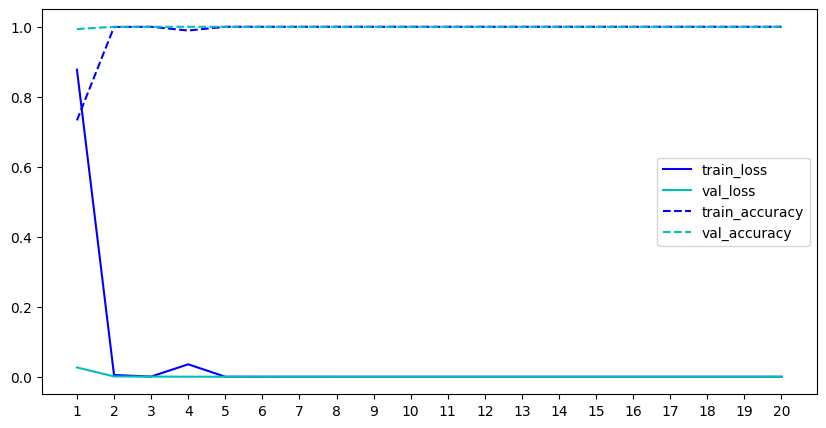

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))
n_epochs = len(h['loss'])
ax.plot(range(1, n_epochs+1), h['loss'], color='b', label='train_loss')
ax.plot(range(1, n_epochs+1), h['val_loss'], color='c', label='val_loss')
ax.plot(range(1, n_epochs+1), h['accuracy'], color='b', label='train_accuracy', linestyle='--')
ax.plot(range(1, n_epochs+1), h['val_accuracy'], color='c', label='val_accuracy', linestyle='--')
ax.set_xticks(range(1, n_epochs+1))
ax.legend()

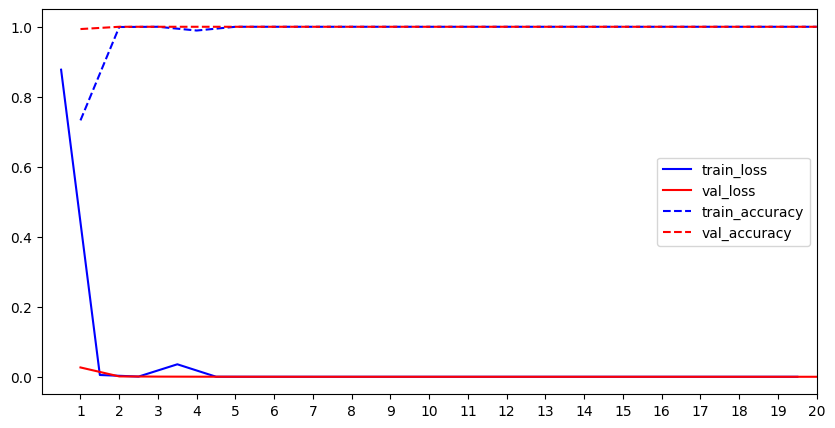

In [26]:
# Training Loss Correction

fig, ax = plt.subplots(figsize=(10, 5))
n_epochs = len(h['loss'])

# Shift training loss by 0.5 as training loss is measured during the epoch and validation loss is measured after the epoch

x_loss = np.arange(n_epochs+1)-0.5
ax.plot(x_loss[x_loss >= 0], h['loss'], color='b', label='train_loss')
ax.plot(range(1, n_epochs+1), h['val_loss'], color='r', label='val_loss')
ax.plot(range(1, n_epochs+1), h['accuracy'], color='b', label='train_accuracy', linestyle='--')
ax.plot(range(1, n_epochs+1), h['val_accuracy'], color='r', label='val_accuracy', linestyle='--')
ax.set_xlim(0, n_epochs)
ax.set_xticks(range(1, n_epochs+1))
ax.legend()

In [27]:
# Defining a function the get the training and validation plots representing the accuracy and loss at each epoch

def get_train_val_plots(h, yticks=None, figsize=(10, 5)):
    # h: Any dictionary like the history.history
    
    fig, ax = plt.subplots(figsize=figsize)
    n_epochs = len(h['loss'])
    x_loss = np.arange(n_epochs+1)-0.5
    
    ax.plot(x_loss[x_loss >= 0], h['loss'], color='b', label='train_loss')
    ax.plot(range(1, n_epochs+1), h['val_loss'], color='r', label='val_loss')
    ax.plot(range(1, n_epochs+1), h['accuracy'], color='b', label='train_accuracy', linestyle='--')
    ax.plot(range(1, n_epochs+1), h['val_accuracy'], color='r', label='val_accuracy', linestyle='--')
    ax.set_xlim(0, n_epochs)
    ax.set_xticks(range(1, n_epochs+1))
    if yticks is not None:
        ax.set_yticks(yticks)
    ax.legend()

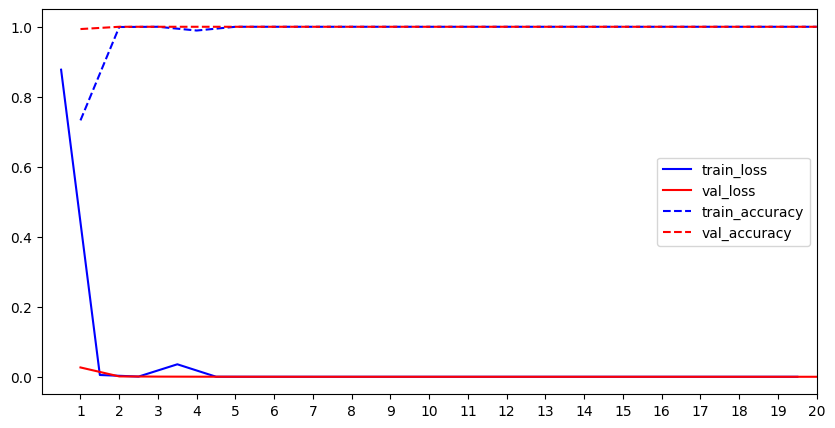

In [28]:
get_train_val_plots(h)

In [29]:
test_df = pd.read_csv('data/alphabet/sign_mnist_test.csv') # Load the test data

In [30]:
X_test, y_test = test_df.drop('label', axis=1), test_df['label']

In [31]:
X_test = tf.reshape(X_test, [-1, 28, 28, 1])

In [32]:
y_test = label_binarizer.transform(y_test)

In [33]:
best_model.evaluate(X_test, y_test)

225/225 [==============================] - 2s 9ms/step - loss: 117.7478 - accuracy: 0.9057


[117.7477798461914, 0.9057445526123047]

Accuracy: 94%

In [34]:
# Preprocesses the input and evaluates the model

def evaluate_model(model, X_test, y_test, label_binarizer):
    X_test_reshape = tf.reshape(X_test, [-1, 28, 28, 1])
    y_test_labels = label_binarizer.transform(y_test)
    results = model.evaluate(X_test_reshape, y_test_labels)
    print(f'Loss: {results[0]:.3f} Accuracy: {results[1]:.3f}')

In [35]:
results = evaluate_model(best_model, test_df.drop('label', axis=1), test_df['label'], label_binarizer)

225/225 [==============================] - 2s 9ms/step - loss: 117.7478 - accuracy: 0.9057
Loss: 117.748 Accuracy: 0.906


## Converting Images to a Sentence

In [36]:
test_df = pd.read_csv('data/alphabet/sign_mnist_test.csv') # Load the test data

In [37]:
X_test, y_test = test_df.drop('label', axis=1), test_df['label']

In [38]:
X_test = tf.reshape(X_test, [-1, 28, 28, 1])

In [39]:
d = {chr(ord('a') + i):i for i in range(26)}
d_rev = {i:chr(ord('a') + i) for i in range(26)}
d[' '] = d_rev[' '] = ' '

In [40]:
sentence = 'sign language'

for i in sentence:
    print(d[i], end=' ')

18 8 6 13   11 0 13 6 20 0 6 4 

In [41]:
best_model.predict(tf.reshape(X_test[0], [-1, 28, 28, 1]))

1/1 [==============================] - 0s 49ms/step


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [42]:
images_taken = []
result = ''

for i in sentence:
    if i != ' ':
        char_index = np.random.choice(y_test[y_test==ord(i)-ord('a')].index)
        images_taken.append(char_index)
        y_pred = best_model.predict(tf.reshape(X_test[char_index], [-1, 28, 28, 1]))
        result += d_rev[label_binarizer.inverse_transform(y_pred)[0]]
    else:
        result += ' '
print(result)

1/1 [==============================] - 0s 9ms/step
sigs langkage


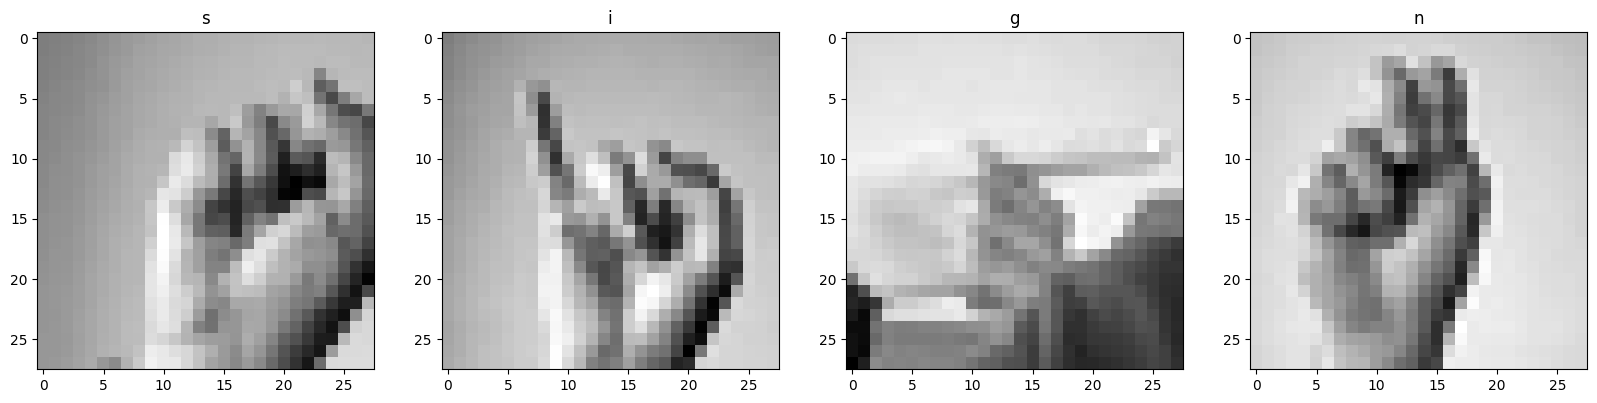

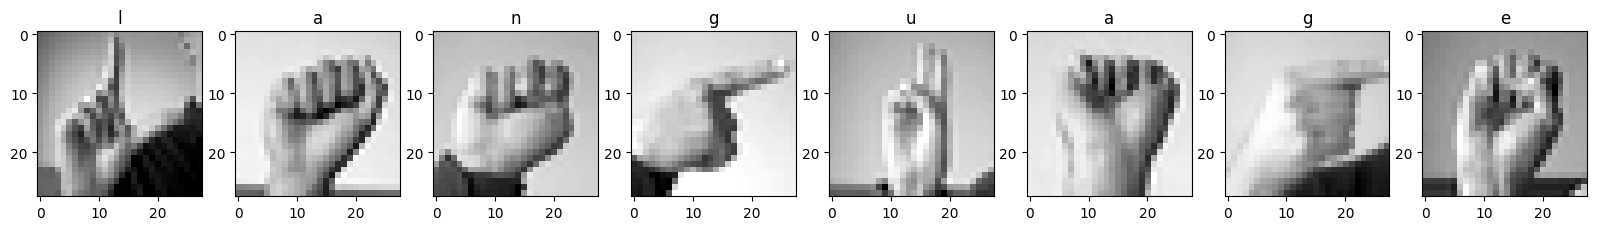

In [43]:
# Visualizing the test images
images_taken_dup = list(reversed(images_taken))
for word in sentence.split():
    fig, ax = plt.subplots(1, len(word), figsize=(20, 20))
    for i in range(len(word)):
        ax[i].imshow(X_test[images_taken_dup.pop()], cmap='gray')
        ax[i].set_title(word[i])

In [44]:
def test_on_sentence(model, sentence, X_test, y_test, label_binarizer, figsize=(20, 20)):
    # Random images are taken from X_test along with the corresponding labels in y_test
    # based on the letters in the sentence.
    # These images are fed to the model and its output is printed
    
    sentence = sentence.lower()
    
    d = {chr(ord('a') + i):i for i in range(26)}
    d_rev = {i:chr(ord('a') + i) for i in range(26)}
    d[' '] = d_rev[' '] = ' '
    
    
    images_taken = []
    result = ''
    
    X_test_reshape = tf.reshape(X_test, [-1, 28, 28, 1])
    

    for i in sentence:
        if i != ' ':
            char_index = np.random.choice(y_test[y_test==ord(i)-ord('a')].index)
            images_taken.append(char_index)
            y_pred = model.predict(tf.reshape(X_test_reshape[char_index], [1, 28, 28, 1]))
            result += d_rev[label_binarizer.inverse_transform(y_pred)[0]]
        else:
            result += ' '
            
    print(f'The actual sentence is "{sentence}"')
    print(f'The predicted sentence is "{result}"')
        
    images_taken.reverse()
    for word in sentence.split():
        fig, ax = plt.subplots(1, len(word), figsize=figsize)
        for i in range(len(word)):
            ax[i].imshow(X_test_reshape[images_taken.pop()], cmap='gray')
            ax[i].set_title(word[i])

1/1 [==============================] - 0s 9ms/step
The actual sentence is "sign language"
The predicted sentence is "mign language"


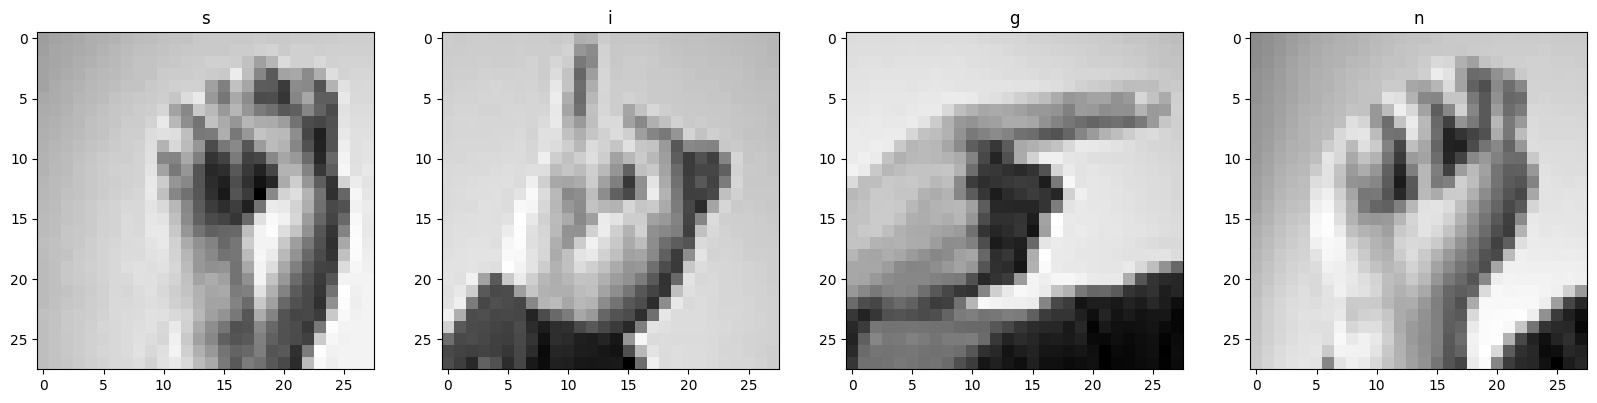

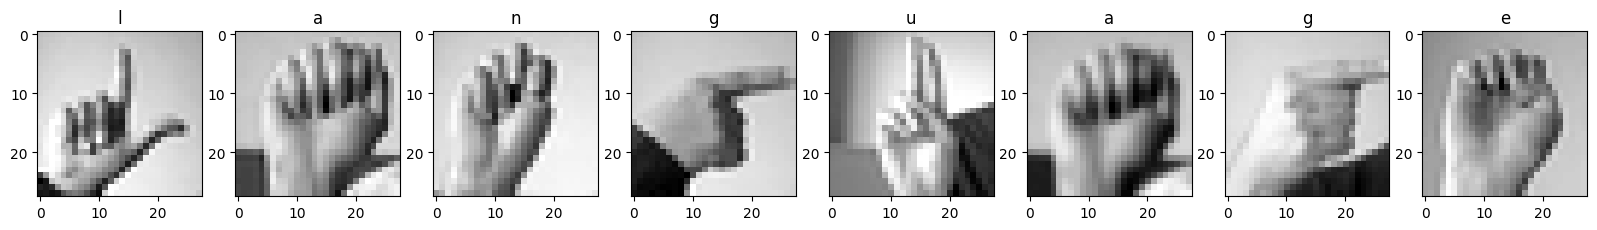

In [45]:
test_on_sentence(best_model, 'sign language', test_df.drop('label', axis=1), test_df['label'], label_binarizer)

# Initial End-to-End Workflow (End)

# Hyperparameter Tuning

1. Convolution and Max Pooling Pairs
2. Filters in the convolution layers
3. Filter Shape
4. Dropout

## Convolution and Max Pooling Pairs

Before flattening


1. For pair = 1 -> Output to the dense layer will be of the shape `(None, 14, 14, 32)`
2. For pair = 2 -> Output to the dense layer will be of the shape `(None, 7, 7, 64)`
3. For pair = 3 -> Output to the dense layer will be of the shape `(None, 3, 3, 96)`
4. For pair = 4 -> Output to the dense layer will be of the shape `(None, 1, 1, 128)`

As the output shape rapidly decreases for the pair = 4 it is better to choose among the pair = 1, 2 or 3

In [46]:
# 20% Validation Split

X_train, X_valid = X[:19500], X[19500:]
y_train, y_valid = y[:19500], y[19500:]

In [47]:
# Models
# 'models/experiment-1-1'
# 'models/experiment-1-2'
# 'models/experiment-1-3'

# History objects
# 'models/experiment-1-1-history'
# 'models/experiment-1-2-history'
# 'models/experiment-1-3-history'

n_pairs = 3
models_pairs = [keras.models.Sequential() for i in range(n_pairs)]
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

for n in range(1, n_pairs+1):
    models_pairs[n-1].add(keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
    models_pairs[n-1].add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    for i in range(1, n):
        models_pairs[n-1].add(keras.layers.Conv2D(32*(i+1), (5, 5), padding='same', activation='relu'))
        models_pairs[n-1].add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    models_pairs[n-1].add(keras.layers.Flatten())
    models_pairs[n-1].add(keras.layers.Dense(128, activation='relu'))
    models_pairs[n-1].add(keras.layers.Dense(24, activation='softmax'))
    models_pairs[n-1].compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    save_best_cb = keras.callbacks.ModelCheckpoint(f'models/experiment-1-{n}', save_best_only=True)
    history = models_pairs[n-1].fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])
    with open(f'models/experiment-1-{n}-history', 'wb') as history_file:
        pickle.dump(history.history, history_file)

Epoch 1/15
607/610 [============================>.] - ETA: 0s - loss: 1.2241 - accuracy: 0.6641INFO:tensorflow:Assets written to: models/experiment-1-1/assets


INFO:tensorflow:Assets written to: models/experiment-1-1/assets


610/610 [==============================] - 7s 10ms/step - loss: 1.2206 - accuracy: 0.6650 - val_loss: 0.3658 - val_accuracy: 0.8940
Epoch 2/15
603/610 [============================>.] - ETA: 0s - loss: 0.1757 - accuracy: 0.9662INFO:tensorflow:Assets written to: models/experiment-1-1/assets


INFO:tensorflow:Assets written to: models/experiment-1-1/assets


610/610 [==============================] - 6s 10ms/step - loss: 0.1747 - accuracy: 0.9666 - val_loss: 0.0732 - val_accuracy: 0.9946
Epoch 3/15
609/610 [============================>.] - ETA: 0s - loss: 0.0401 - accuracy: 0.9983INFO:tensorflow:Assets written to: models/experiment-1-1/assets


INFO:tensorflow:Assets written to: models/experiment-1-1/assets


610/610 [==============================] - 6s 10ms/step - loss: 0.0401 - accuracy: 0.9983 - val_loss: 0.0220 - val_accuracy: 0.9994
Epoch 4/15
607/610 [============================>.] - ETA: 0s - loss: 0.0134 - accuracy: 0.9999INFO:tensorflow:Assets written to: models/experiment-1-1/assets


INFO:tensorflow:Assets written to: models/experiment-1-1/assets


610/610 [==============================] - 6s 10ms/step - loss: 0.0134 - accuracy: 0.9999 - val_loss: 0.0088 - val_accuracy: 1.0000
Epoch 5/15
609/610 [============================>.] - ETA: 0s - loss: 0.0065 - accuracy: 0.9999INFO:tensorflow:Assets written to: models/experiment-1-1/assets


INFO:tensorflow:Assets written to: models/experiment-1-1/assets


610/610 [==============================] - 6s 10ms/step - loss: 0.0065 - accuracy: 0.9999 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 6/15
607/610 [============================>.] - ETA: 0s - loss: 0.0037 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-1/assets


INFO:tensorflow:Assets written to: models/experiment-1-1/assets


610/610 [==============================] - 6s 10ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 7/15
604/610 [============================>.] - ETA: 0s - loss: 0.0023 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-1/assets


INFO:tensorflow:Assets written to: models/experiment-1-1/assets


610/610 [==============================] - 6s 10ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 8/15
606/610 [============================>.] - ETA: 0s - loss: 0.0236 - accuracy: 0.9932INFO:tensorflow:Assets written to: models/experiment-1-1/assets


INFO:tensorflow:Assets written to: models/experiment-1-1/assets


610/610 [==============================] - 6s 10ms/step - loss: 0.0235 - accuracy: 0.9933 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 9/15
609/610 [============================>.] - ETA: 0s - loss: 9.9133e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-1/assets


INFO:tensorflow:Assets written to: models/experiment-1-1/assets


610/610 [==============================] - 6s 10ms/step - loss: 9.9120e-04 - accuracy: 1.0000 - val_loss: 7.2975e-04 - val_accuracy: 1.0000
Epoch 10/15
608/610 [============================>.] - ETA: 0s - loss: 6.0436e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-1/assets


INFO:tensorflow:Assets written to: models/experiment-1-1/assets


610/610 [==============================] - 6s 9ms/step - loss: 6.0433e-04 - accuracy: 1.0000 - val_loss: 5.0533e-04 - val_accuracy: 1.0000
Epoch 11/15
603/610 [============================>.] - ETA: 0s - loss: 4.7938e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-1/assets


INFO:tensorflow:Assets written to: models/experiment-1-1/assets


610/610 [==============================] - 6s 9ms/step - loss: 4.7767e-04 - accuracy: 1.0000 - val_loss: 4.5436e-04 - val_accuracy: 1.0000
Epoch 12/15
604/610 [============================>.] - ETA: 0s - loss: 3.4957e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-1/assets


INFO:tensorflow:Assets written to: models/experiment-1-1/assets


610/610 [==============================] - 5s 9ms/step - loss: 3.4857e-04 - accuracy: 1.0000 - val_loss: 3.1722e-04 - val_accuracy: 1.0000
Epoch 13/15
610/610 [==============================] - 5s 9ms/step - loss: 2.5672e-04 - accuracy: 1.0000 - val_loss: 3.2642e-04 - val_accuracy: 1.0000
Epoch 14/15
607/610 [============================>.] - ETA: 0s - loss: 1.9182e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-1/assets


INFO:tensorflow:Assets written to: models/experiment-1-1/assets


610/610 [==============================] - 6s 9ms/step - loss: 1.9257e-04 - accuracy: 1.0000 - val_loss: 1.9294e-04 - val_accuracy: 1.0000
Epoch 15/15
608/610 [============================>.] - ETA: 0s - loss: 1.5963e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-1/assets


INFO:tensorflow:Assets written to: models/experiment-1-1/assets


610/610 [==============================] - 6s 9ms/step - loss: 1.5966e-04 - accuracy: 1.0000 - val_loss: 1.6669e-04 - val_accuracy: 1.0000
Epoch 1/15
607/610 [============================>.] - ETA: 0s - loss: 0.9605 - accuracy: 0.7111INFO:tensorflow:Assets written to: models/experiment-1-2/assets


INFO:tensorflow:Assets written to: models/experiment-1-2/assets


610/610 [==============================] - 11s 17ms/step - loss: 0.9571 - accuracy: 0.7122 - val_loss: 0.1432 - val_accuracy: 0.9563
Epoch 2/15
609/610 [============================>.] - ETA: 0s - loss: 0.0369 - accuracy: 0.9925INFO:tensorflow:Assets written to: models/experiment-1-2/assets


INFO:tensorflow:Assets written to: models/experiment-1-2/assets


610/610 [==============================] - 10s 17ms/step - loss: 0.0369 - accuracy: 0.9925 - val_loss: 0.0089 - val_accuracy: 0.9990
Epoch 3/15
607/610 [============================>.] - ETA: 0s - loss: 0.0029 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-2/assets


INFO:tensorflow:Assets written to: models/experiment-1-2/assets


610/610 [==============================] - 10s 17ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 4/15
609/610 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-2/assets


INFO:tensorflow:Assets written to: models/experiment-1-2/assets


610/610 [==============================] - 10s 17ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 8.0230e-04 - val_accuracy: 1.0000
Epoch 5/15
607/610 [============================>.] - ETA: 0s - loss: 5.5490e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-2/assets


INFO:tensorflow:Assets written to: models/experiment-1-2/assets


610/610 [==============================] - 10s 17ms/step - loss: 5.5433e-04 - accuracy: 1.0000 - val_loss: 4.1649e-04 - val_accuracy: 1.0000
Epoch 6/15
607/610 [============================>.] - ETA: 0s - loss: 3.1125e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-2/assets


INFO:tensorflow:Assets written to: models/experiment-1-2/assets


610/610 [==============================] - 11s 18ms/step - loss: 3.1110e-04 - accuracy: 1.0000 - val_loss: 2.6848e-04 - val_accuracy: 1.0000
Epoch 7/15
610/610 [==============================] - 11s 18ms/step - loss: 0.0394 - accuracy: 0.9870 - val_loss: 0.0215 - val_accuracy: 0.9962
Epoch 8/15
610/610 [==============================] - 11s 18ms/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 4.0158e-04 - val_accuracy: 1.0000
Epoch 9/15
607/610 [============================>.] - ETA: 0s - loss: 2.1017e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-2/assets


INFO:tensorflow:Assets written to: models/experiment-1-2/assets


610/610 [==============================] - 11s 18ms/step - loss: 2.0992e-04 - accuracy: 1.0000 - val_loss: 1.6227e-04 - val_accuracy: 1.0000
Epoch 10/15
607/610 [============================>.] - ETA: 0s - loss: 1.0738e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-2/assets


INFO:tensorflow:Assets written to: models/experiment-1-2/assets


610/610 [==============================] - 11s 18ms/step - loss: 1.0731e-04 - accuracy: 1.0000 - val_loss: 9.6069e-05 - val_accuracy: 1.0000
Epoch 11/15
607/610 [============================>.] - ETA: 0s - loss: 6.7583e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-2/assets


INFO:tensorflow:Assets written to: models/experiment-1-2/assets


610/610 [==============================] - 11s 18ms/step - loss: 6.7575e-05 - accuracy: 1.0000 - val_loss: 6.3277e-05 - val_accuracy: 1.0000
Epoch 12/15
608/610 [============================>.] - ETA: 0s - loss: 4.5705e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-2/assets


INFO:tensorflow:Assets written to: models/experiment-1-2/assets


610/610 [==============================] - 11s 18ms/step - loss: 4.5644e-05 - accuracy: 1.0000 - val_loss: 4.4154e-05 - val_accuracy: 1.0000
Epoch 13/15
607/610 [============================>.] - ETA: 0s - loss: 3.2224e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-2/assets


INFO:tensorflow:Assets written to: models/experiment-1-2/assets


610/610 [==============================] - 11s 18ms/step - loss: 3.2235e-05 - accuracy: 1.0000 - val_loss: 3.2106e-05 - val_accuracy: 1.0000
Epoch 14/15
607/610 [============================>.] - ETA: 0s - loss: 2.3224e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-2/assets


INFO:tensorflow:Assets written to: models/experiment-1-2/assets


610/610 [==============================] - 11s 18ms/step - loss: 2.3213e-05 - accuracy: 1.0000 - val_loss: 2.3880e-05 - val_accuracy: 1.0000
Epoch 15/15
609/610 [============================>.] - ETA: 0s - loss: 1.7102e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-2/assets


INFO:tensorflow:Assets written to: models/experiment-1-2/assets


610/610 [==============================] - 11s 18ms/step - loss: 1.7093e-05 - accuracy: 1.0000 - val_loss: 1.7713e-05 - val_accuracy: 1.0000
Epoch 1/15
610/610 [==============================] - ETA: 0s - loss: 1.0615 - accuracy: 0.6734INFO:tensorflow:Assets written to: models/experiment-1-3/assets


INFO:tensorflow:Assets written to: models/experiment-1-3/assets


610/610 [==============================] - 14s 22ms/step - loss: 1.0615 - accuracy: 0.6734 - val_loss: 0.0983 - val_accuracy: 0.9741
Epoch 2/15
607/610 [============================>.] - ETA: 0s - loss: 0.0382 - accuracy: 0.9904INFO:tensorflow:Assets written to: models/experiment-1-3/assets


INFO:tensorflow:Assets written to: models/experiment-1-3/assets


610/610 [==============================] - 14s 22ms/step - loss: 0.0381 - accuracy: 0.9904 - val_loss: 0.0159 - val_accuracy: 0.9966
Epoch 3/15
610/610 [==============================] - ETA: 0s - loss: 0.0026 - accuracy: 0.9996INFO:tensorflow:Assets written to: models/experiment-1-3/assets


INFO:tensorflow:Assets written to: models/experiment-1-3/assets


610/610 [==============================] - 14s 23ms/step - loss: 0.0026 - accuracy: 0.9996 - val_loss: 4.2517e-04 - val_accuracy: 1.0000
Epoch 4/15
609/610 [============================>.] - ETA: 0s - loss: 2.7773e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-3/assets


INFO:tensorflow:Assets written to: models/experiment-1-3/assets


610/610 [==============================] - 14s 22ms/step - loss: 2.7769e-04 - accuracy: 1.0000 - val_loss: 2.1652e-04 - val_accuracy: 1.0000
Epoch 5/15
610/610 [==============================] - ETA: 0s - loss: 1.5325e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-3/assets


INFO:tensorflow:Assets written to: models/experiment-1-3/assets


610/610 [==============================] - 14s 22ms/step - loss: 1.5325e-04 - accuracy: 1.0000 - val_loss: 1.3258e-04 - val_accuracy: 1.0000
Epoch 6/15
607/610 [============================>.] - ETA: 0s - loss: 9.6782e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-3/assets


INFO:tensorflow:Assets written to: models/experiment-1-3/assets


610/610 [==============================] - 14s 22ms/step - loss: 9.6591e-05 - accuracy: 1.0000 - val_loss: 8.4091e-05 - val_accuracy: 1.0000
Epoch 7/15
610/610 [==============================] - ETA: 0s - loss: 6.1129e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-3/assets


INFO:tensorflow:Assets written to: models/experiment-1-3/assets


610/610 [==============================] - 14s 22ms/step - loss: 6.1129e-05 - accuracy: 1.0000 - val_loss: 5.7781e-05 - val_accuracy: 1.0000
Epoch 8/15
608/610 [============================>.] - ETA: 0s - loss: 4.1466e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-3/assets


INFO:tensorflow:Assets written to: models/experiment-1-3/assets


610/610 [==============================] - 13s 22ms/step - loss: 4.1453e-05 - accuracy: 1.0000 - val_loss: 3.8684e-05 - val_accuracy: 1.0000
Epoch 9/15
609/610 [============================>.] - ETA: 0s - loss: 2.8038e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-3/assets


INFO:tensorflow:Assets written to: models/experiment-1-3/assets


610/610 [==============================] - 14s 22ms/step - loss: 2.8065e-05 - accuracy: 1.0000 - val_loss: 2.6194e-05 - val_accuracy: 1.0000
Epoch 10/15
609/610 [============================>.] - ETA: 0s - loss: 1.8887e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-3/assets


INFO:tensorflow:Assets written to: models/experiment-1-3/assets


610/610 [==============================] - 14s 22ms/step - loss: 1.8879e-05 - accuracy: 1.0000 - val_loss: 1.7739e-05 - val_accuracy: 1.0000
Epoch 11/15
608/610 [============================>.] - ETA: 0s - loss: 1.2938e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-3/assets


INFO:tensorflow:Assets written to: models/experiment-1-3/assets


610/610 [==============================] - 14s 23ms/step - loss: 1.2916e-05 - accuracy: 1.0000 - val_loss: 1.3732e-05 - val_accuracy: 1.0000
Epoch 12/15
609/610 [============================>.] - ETA: 0s - loss: 8.6070e-06 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-3/assets


INFO:tensorflow:Assets written to: models/experiment-1-3/assets


610/610 [==============================] - 13s 22ms/step - loss: 8.6025e-06 - accuracy: 1.0000 - val_loss: 8.2573e-06 - val_accuracy: 1.0000
Epoch 13/15
610/610 [==============================] - ETA: 0s - loss: 5.2272e-06 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-3/assets


INFO:tensorflow:Assets written to: models/experiment-1-3/assets


610/610 [==============================] - 14s 22ms/step - loss: 5.2272e-06 - accuracy: 1.0000 - val_loss: 4.8568e-06 - val_accuracy: 1.0000
Epoch 14/15
607/610 [============================>.] - ETA: 0s - loss: 3.4959e-06 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-3/assets


INFO:tensorflow:Assets written to: models/experiment-1-3/assets


610/610 [==============================] - 14s 22ms/step - loss: 3.4973e-06 - accuracy: 1.0000 - val_loss: 3.6765e-06 - val_accuracy: 1.0000
Epoch 15/15
607/610 [============================>.] - ETA: 0s - loss: 2.2503e-06 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-1-3/assets


INFO:tensorflow:Assets written to: models/experiment-1-3/assets


610/610 [==============================] - 14s 23ms/step - loss: 2.2485e-06 - accuracy: 1.0000 - val_loss: 2.5110e-06 - val_accuracy: 1.0000


In [48]:
models_pairs[0].summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               802944    
                                                                 
 dense_3 (Dense)             (None, 24)                3096      
                                                                 
Total params: 806872 (3.08 MB)
Trainable params: 806872 (3.08 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [49]:
models_pairs[1].summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [50]:
models_pairs[2].summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 96)          153696    
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 3, 3, 96)         

In [51]:
for index in range(n_pairs):
    model = keras.models.load_model(f'models/experiment-1-{index+1}')
    model.evaluate(X_valid, y_valid)

249/249 [==============================] - 2s 9ms/step - loss: 2.5110e-06 - accuracy: 1.0000


In [52]:
h_1_1 = np.load('models/experiment-1-1-history', allow_pickle=True)
h_1_2 = np.load('models/experiment-1-2-history', allow_pickle=True)
h_1_3 = np.load('models/experiment-1-3-history', allow_pickle=True)

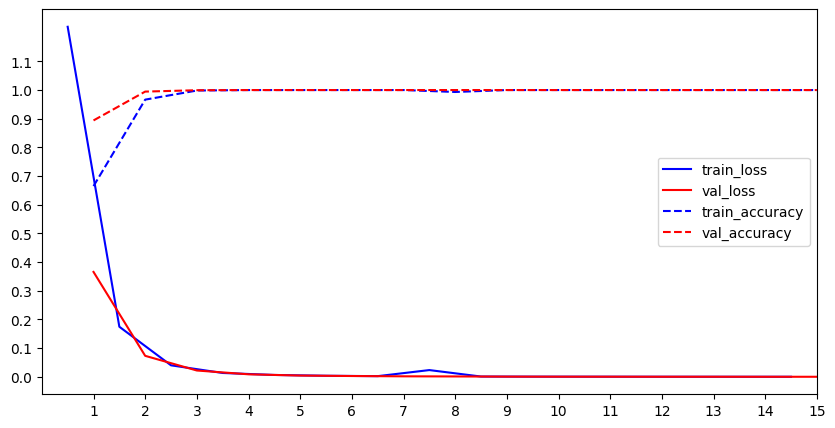

In [53]:
get_train_val_plots(h_1_1, yticks=np.arange(0, 1.2, 0.1))

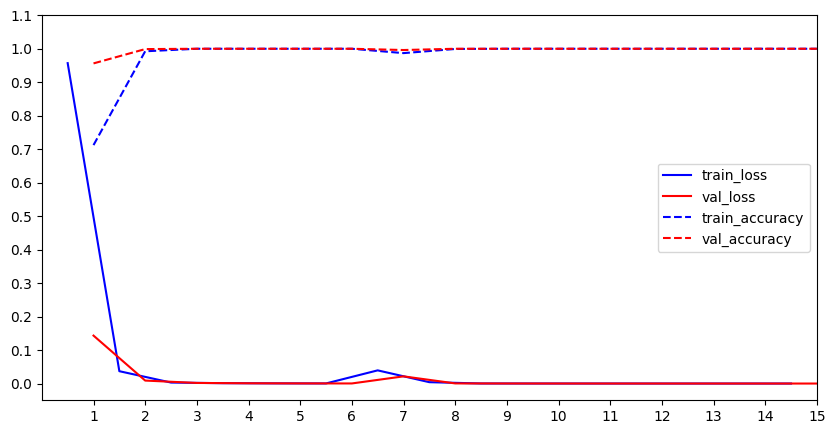

In [54]:
get_train_val_plots(h_1_2, yticks=np.arange(0, 1.2, 0.1))

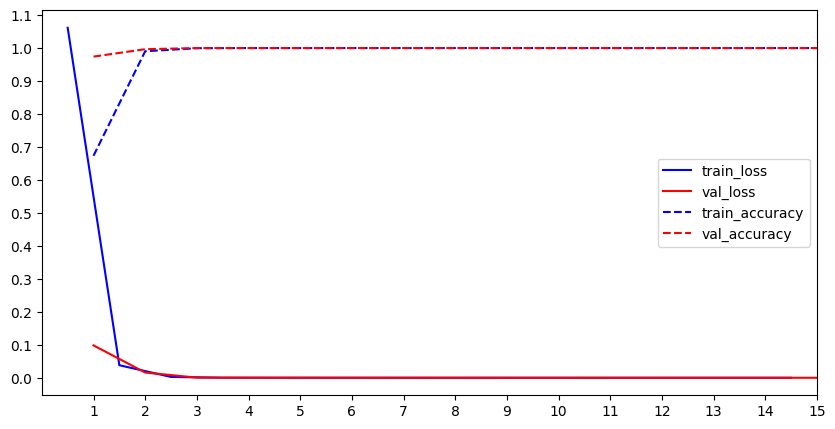

In [55]:
get_train_val_plots(h_1_3, yticks=np.arange(0, 1.2, 0.1))

Model 3 has the least loss on the validation data

## Filters

Our Models now contains 3 pairs of Convolution and Pooling layers

Number of filters maps can be

1. 8 - 16 - 32
2. 16 - 32 - 64
3. 24 - 48 - 96

In [56]:
# Models
# 'models/experiment-fmaps-1'
# 'models/experiment-fmaps-2'
# 'models/experiment-fmaps-3'

# History objects
# 'models/experiment-fmaps-1-history'
# 'models/experiment-fmaps-2-history'
# 'models/experiment-fmaps-3-history'

n_tests = 3

models = []
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)


for i in range(n_tests):
    model = keras.models.Sequential()
    models.append(model)
    model.add(keras.layers.Input(shape=(28, 28, 1)))
    for pairs in range(3):
        model.add(keras.layers.Conv2D((8*(i+1))*(2**pairs), (5, 5), padding='same', activation='relu'))
        model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(24, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    save_best_cb = keras.callbacks.ModelCheckpoint(f'models/experiment-fmaps-{i+1}', save_best_only=True)
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])
    with open(f'models/experiment-fmaps-{i+1}-history', 'wb') as history_file:
        pickle.dump(history.history, history_file)

Epoch 1/10
609/610 [============================>.] - ETA: 0s - loss: 1.3596 - accuracy: 0.5805INFO:tensorflow:Assets written to: models/experiment-fmaps-1/assets


INFO:tensorflow:Assets written to: models/experiment-fmaps-1/assets


610/610 [==============================] - 8s 12ms/step - loss: 1.3589 - accuracy: 0.5807 - val_loss: 0.4372 - val_accuracy: 0.8631
Epoch 2/10
609/610 [============================>.] - ETA: 0s - loss: 0.2014 - accuracy: 0.9378INFO:tensorflow:Assets written to: models/experiment-fmaps-1/assets


INFO:tensorflow:Assets written to: models/experiment-fmaps-1/assets


610/610 [==============================] - 7s 12ms/step - loss: 0.2013 - accuracy: 0.9378 - val_loss: 0.0701 - val_accuracy: 0.9872
Epoch 3/10
607/610 [============================>.] - ETA: 0s - loss: 0.0399 - accuracy: 0.9922INFO:tensorflow:Assets written to: models/experiment-fmaps-1/assets


INFO:tensorflow:Assets written to: models/experiment-fmaps-1/assets


610/610 [==============================] - 7s 12ms/step - loss: 0.0398 - accuracy: 0.9922 - val_loss: 0.0293 - val_accuracy: 0.9952
Epoch 4/10
610/610 [==============================] - ETA: 0s - loss: 0.0306 - accuracy: 0.9929INFO:tensorflow:Assets written to: models/experiment-fmaps-1/assets


INFO:tensorflow:Assets written to: models/experiment-fmaps-1/assets


610/610 [==============================] - 7s 11ms/step - loss: 0.0306 - accuracy: 0.9929 - val_loss: 0.0068 - val_accuracy: 0.9987
Epoch 5/10
610/610 [==============================] - ETA: 0s - loss: 0.0036 - accuracy: 0.9998INFO:tensorflow:Assets written to: models/experiment-fmaps-1/assets


INFO:tensorflow:Assets written to: models/experiment-fmaps-1/assets


610/610 [==============================] - 7s 11ms/step - loss: 0.0036 - accuracy: 0.9998 - val_loss: 0.0018 - val_accuracy: 0.9999
Epoch 6/10
608/610 [============================>.] - ETA: 0s - loss: 0.0010 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-fmaps-1/assets


INFO:tensorflow:Assets written to: models/experiment-fmaps-1/assets


610/610 [==============================] - 7s 11ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 0.9999
Epoch 7/10
610/610 [==============================] - 6s 10ms/step - loss: 0.0301 - accuracy: 0.9906 - val_loss: 0.0707 - val_accuracy: 0.9772
Epoch 8/10
609/610 [============================>.] - ETA: 0s - loss: 0.0185 - accuracy: 0.9938INFO:tensorflow:Assets written to: models/experiment-fmaps-1/assets


INFO:tensorflow:Assets written to: models/experiment-fmaps-1/assets


610/610 [==============================] - 7s 11ms/step - loss: 0.0185 - accuracy: 0.9938 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 9/10
607/610 [============================>.] - ETA: 0s - loss: 7.9646e-04 - accuracy: 0.9998INFO:tensorflow:Assets written to: models/experiment-fmaps-1/assets


INFO:tensorflow:Assets written to: models/experiment-fmaps-1/assets


610/610 [==============================] - 7s 11ms/step - loss: 7.9475e-04 - accuracy: 0.9998 - val_loss: 4.4102e-04 - val_accuracy: 1.0000
Epoch 10/10
610/610 [==============================] - 6s 10ms/step - loss: 0.0266 - accuracy: 0.9914 - val_loss: 0.0080 - val_accuracy: 0.9981
Epoch 1/10
610/610 [==============================] - ETA: 0s - loss: 1.0608 - accuracy: 0.6735INFO:tensorflow:Assets written to: models/experiment-fmaps-2/assets


INFO:tensorflow:Assets written to: models/experiment-fmaps-2/assets


610/610 [==============================] - 8s 14ms/step - loss: 1.0608 - accuracy: 0.6735 - val_loss: 0.1237 - val_accuracy: 0.9707
Epoch 2/10
607/610 [============================>.] - ETA: 0s - loss: 0.0500 - accuracy: 0.9879INFO:tensorflow:Assets written to: models/experiment-fmaps-2/assets


INFO:tensorflow:Assets written to: models/experiment-fmaps-2/assets


610/610 [==============================] - 8s 14ms/step - loss: 0.0498 - accuracy: 0.9879 - val_loss: 0.0109 - val_accuracy: 0.9981
Epoch 3/10
609/610 [============================>.] - ETA: 0s - loss: 0.0335 - accuracy: 0.9914INFO:tensorflow:Assets written to: models/experiment-fmaps-2/assets


INFO:tensorflow:Assets written to: models/experiment-fmaps-2/assets


610/610 [==============================] - 8s 14ms/step - loss: 0.0335 - accuracy: 0.9914 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 4/10
607/610 [============================>.] - ETA: 0s - loss: 6.9553e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-fmaps-2/assets


INFO:tensorflow:Assets written to: models/experiment-fmaps-2/assets


610/610 [==============================] - 8s 14ms/step - loss: 6.9429e-04 - accuracy: 1.0000 - val_loss: 4.4840e-04 - val_accuracy: 1.0000
Epoch 5/10
609/610 [============================>.] - ETA: 0s - loss: 2.9573e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-fmaps-2/assets


INFO:tensorflow:Assets written to: models/experiment-fmaps-2/assets


610/610 [==============================] - 8s 13ms/step - loss: 2.9569e-04 - accuracy: 1.0000 - val_loss: 2.8752e-04 - val_accuracy: 1.0000
Epoch 6/10
609/610 [============================>.] - ETA: 0s - loss: 1.7509e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-fmaps-2/assets


INFO:tensorflow:Assets written to: models/experiment-fmaps-2/assets


610/610 [==============================] - 8s 12ms/step - loss: 1.7500e-04 - accuracy: 1.0000 - val_loss: 1.6366e-04 - val_accuracy: 1.0000
Epoch 7/10
608/610 [============================>.] - ETA: 0s - loss: 1.1398e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-fmaps-2/assets


INFO:tensorflow:Assets written to: models/experiment-fmaps-2/assets


610/610 [==============================] - 8s 13ms/step - loss: 1.1382e-04 - accuracy: 1.0000 - val_loss: 1.0887e-04 - val_accuracy: 1.0000
Epoch 8/10
607/610 [============================>.] - ETA: 0s - loss: 7.8161e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-fmaps-2/assets


INFO:tensorflow:Assets written to: models/experiment-fmaps-2/assets


610/610 [==============================] - 8s 13ms/step - loss: 7.8342e-05 - accuracy: 1.0000 - val_loss: 7.8510e-05 - val_accuracy: 1.0000
Epoch 9/10
609/610 [============================>.] - ETA: 0s - loss: 5.5673e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-fmaps-2/assets


INFO:tensorflow:Assets written to: models/experiment-fmaps-2/assets


610/610 [==============================] - 8s 13ms/step - loss: 5.5684e-05 - accuracy: 1.0000 - val_loss: 5.4336e-05 - val_accuracy: 1.0000
Epoch 10/10
608/610 [============================>.] - ETA: 0s - loss: 3.7636e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-fmaps-2/assets


INFO:tensorflow:Assets written to: models/experiment-fmaps-2/assets


610/610 [==============================] - 8s 13ms/step - loss: 3.7623e-05 - accuracy: 1.0000 - val_loss: 3.9684e-05 - val_accuracy: 1.0000
Epoch 1/10
610/610 [==============================] - ETA: 0s - loss: 0.8677 - accuracy: 0.7349INFO:tensorflow:Assets written to: models/experiment-fmaps-3/assets


INFO:tensorflow:Assets written to: models/experiment-fmaps-3/assets


610/610 [==============================] - 11s 18ms/step - loss: 0.8677 - accuracy: 0.7349 - val_loss: 0.1295 - val_accuracy: 0.9620
Epoch 2/10
608/610 [============================>.] - ETA: 0s - loss: 0.0291 - accuracy: 0.9922INFO:tensorflow:Assets written to: models/experiment-fmaps-3/assets


INFO:tensorflow:Assets written to: models/experiment-fmaps-3/assets


610/610 [==============================] - 11s 17ms/step - loss: 0.0290 - accuracy: 0.9922 - val_loss: 0.0473 - val_accuracy: 0.9860
Epoch 3/10
609/610 [============================>.] - ETA: 0s - loss: 0.0221 - accuracy: 0.9956INFO:tensorflow:Assets written to: models/experiment-fmaps-3/assets


INFO:tensorflow:Assets written to: models/experiment-fmaps-3/assets


610/610 [==============================] - 11s 17ms/step - loss: 0.0221 - accuracy: 0.9956 - val_loss: 5.5914e-04 - val_accuracy: 1.0000
Epoch 4/10
609/610 [============================>.] - ETA: 0s - loss: 3.1968e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-fmaps-3/assets


INFO:tensorflow:Assets written to: models/experiment-fmaps-3/assets


610/610 [==============================] - 10s 17ms/step - loss: 3.1960e-04 - accuracy: 1.0000 - val_loss: 2.7828e-04 - val_accuracy: 1.0000
Epoch 5/10
607/610 [============================>.] - ETA: 0s - loss: 1.6450e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-fmaps-3/assets


INFO:tensorflow:Assets written to: models/experiment-fmaps-3/assets


610/610 [==============================] - 11s 18ms/step - loss: 1.6454e-04 - accuracy: 1.0000 - val_loss: 1.3789e-04 - val_accuracy: 1.0000
Epoch 6/10
608/610 [============================>.] - ETA: 0s - loss: 9.8306e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-fmaps-3/assets


INFO:tensorflow:Assets written to: models/experiment-fmaps-3/assets


610/610 [==============================] - 11s 18ms/step - loss: 9.8218e-05 - accuracy: 1.0000 - val_loss: 8.8669e-05 - val_accuracy: 1.0000
Epoch 7/10
608/610 [============================>.] - ETA: 0s - loss: 6.4983e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-fmaps-3/assets


INFO:tensorflow:Assets written to: models/experiment-fmaps-3/assets


610/610 [==============================] - 11s 18ms/step - loss: 6.4918e-05 - accuracy: 1.0000 - val_loss: 6.2003e-05 - val_accuracy: 1.0000
Epoch 8/10
608/610 [============================>.] - ETA: 0s - loss: 4.3734e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-fmaps-3/assets


INFO:tensorflow:Assets written to: models/experiment-fmaps-3/assets


610/610 [==============================] - 11s 18ms/step - loss: 4.3685e-05 - accuracy: 1.0000 - val_loss: 4.2129e-05 - val_accuracy: 1.0000
Epoch 9/10
607/610 [============================>.] - ETA: 0s - loss: 2.9963e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-fmaps-3/assets


INFO:tensorflow:Assets written to: models/experiment-fmaps-3/assets


610/610 [==============================] - 11s 18ms/step - loss: 3.0001e-05 - accuracy: 1.0000 - val_loss: 3.1382e-05 - val_accuracy: 1.0000
Epoch 10/10
607/610 [============================>.] - ETA: 0s - loss: 2.0749e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-fmaps-3/assets


INFO:tensorflow:Assets written to: models/experiment-fmaps-3/assets


610/610 [==============================] - 11s 18ms/step - loss: 2.0766e-05 - accuracy: 1.0000 - val_loss: 2.1953e-05 - val_accuracy: 1.0000


In [57]:
models[0].summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 8)         208       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 14, 14, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 16)        3216      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 7, 7, 16)          0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 32)          12832     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 3, 3, 32)         

In [58]:
models[1].summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 32)        12832     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 7, 7, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 7, 7, 64)          51264     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 3, 3, 64)         

In [59]:
models[2].summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 24)        624       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 14, 14, 24)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 48)        28848     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 7, 7, 48)          0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 7, 7, 96)          115296    
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 3, 3, 96)         

In [60]:
for index in range(n_tests):
    model = keras.models.load_model(f'models/experiment-fmaps-{index+1}')
    model.evaluate(X_valid, y_valid)

249/249 [==============================] - 1s 5ms/step - loss: 2.1953e-05 - accuracy: 1.0000


In [61]:
h_2_1 = np.load('models/experiment-fmaps-1-history', allow_pickle=True)
h_2_2 = np.load('models/experiment-fmaps-2-history', allow_pickle=True)
h_2_3 = np.load('models/experiment-fmaps-3-history', allow_pickle=True)

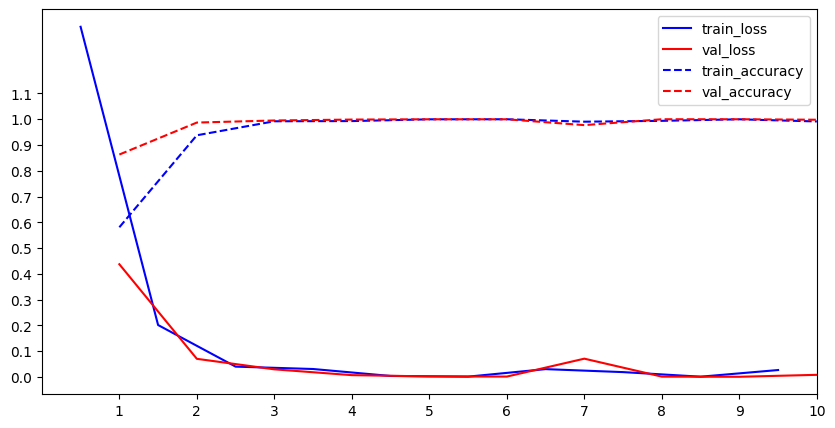

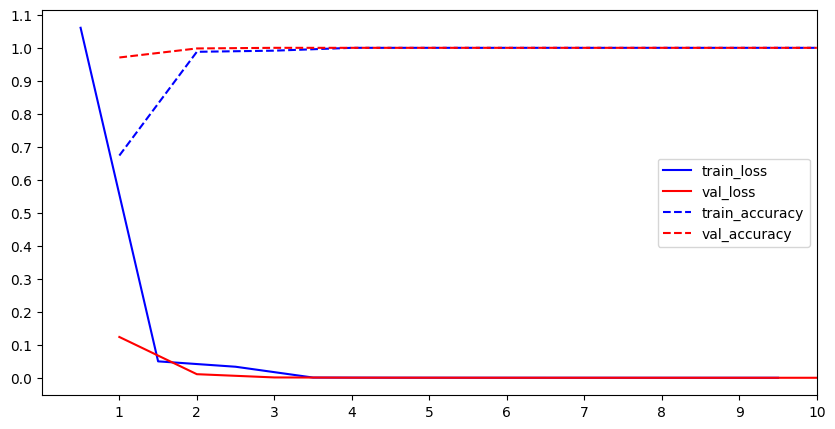

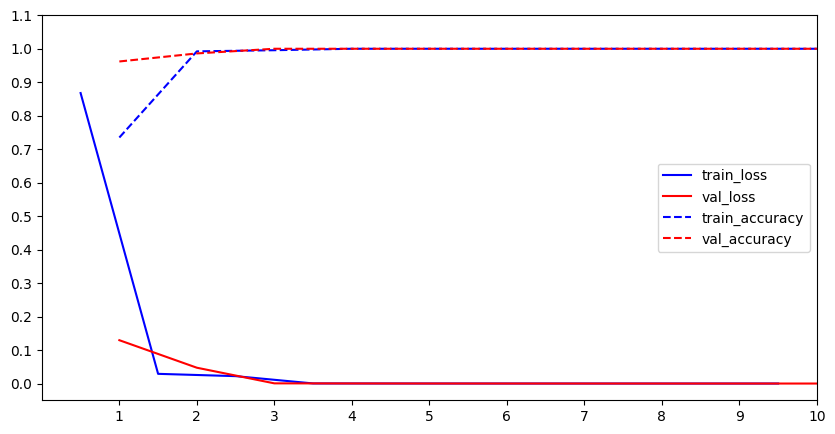

In [62]:
get_train_val_plots(h_2_1, yticks=np.arange(0, 1.2, 0.1))
get_train_val_plots(h_2_2, yticks=np.arange(0, 1.2, 0.1))
get_train_val_plots(h_2_3, yticks=np.arange(0, 1.2, 0.1))

Choose Model 3

## Filter Size

In [63]:
# Models
# 'models/experiment-fiters-1'

# History objects
# 'models/experiment-filters-1-history'

save_best_cb = keras.callbacks.ModelCheckpoint(f'models/experiment-fiters-1', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(24, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(48, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(96, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(24, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])
with open(f'models/experiment-filters-1-history', 'wb') as history_file:
    pickle.dump(history.history, history_file)

Epoch 1/10
609/610 [============================>.] - ETA: 0s - loss: 1.0417 - accuracy: 0.6855INFO:tensorflow:Assets written to: models/experiment-fiters-1/assets


INFO:tensorflow:Assets written to: models/experiment-fiters-1/assets


610/610 [==============================] - 6s 10ms/step - loss: 1.0413 - accuracy: 0.6856 - val_loss: 0.1749 - val_accuracy: 0.9496
Epoch 2/10
607/610 [============================>.] - ETA: 0s - loss: 0.0631 - accuracy: 0.9843INFO:tensorflow:Assets written to: models/experiment-fiters-1/assets


INFO:tensorflow:Assets written to: models/experiment-fiters-1/assets


610/610 [==============================] - 6s 10ms/step - loss: 0.0630 - accuracy: 0.9843 - val_loss: 0.0161 - val_accuracy: 0.9977
Epoch 3/10
610/610 [==============================] - 6s 10ms/step - loss: 0.0220 - accuracy: 0.9939 - val_loss: 0.0180 - val_accuracy: 0.9951
Epoch 4/10
609/610 [============================>.] - ETA: 0s - loss: 0.0156 - accuracy: 0.9952INFO:tensorflow:Assets written to: models/experiment-fiters-1/assets


INFO:tensorflow:Assets written to: models/experiment-fiters-1/assets


610/610 [==============================] - 6s 10ms/step - loss: 0.0156 - accuracy: 0.9952 - val_loss: 8.4663e-04 - val_accuracy: 1.0000
Epoch 5/10
610/610 [==============================] - 6s 9ms/step - loss: 8.5614e-04 - accuracy: 0.9999 - val_loss: 0.0183 - val_accuracy: 0.9928
Epoch 6/10
610/610 [==============================] - 6s 9ms/step - loss: 0.0119 - accuracy: 0.9969 - val_loss: 0.3684 - val_accuracy: 0.8957
Epoch 7/10
605/610 [============================>.] - ETA: 0s - loss: 0.0339 - accuracy: 0.9898INFO:tensorflow:Assets written to: models/experiment-fiters-1/assets


INFO:tensorflow:Assets written to: models/experiment-fiters-1/assets


610/610 [==============================] - 6s 10ms/step - loss: 0.0336 - accuracy: 0.9899 - val_loss: 5.8926e-04 - val_accuracy: 0.9999
Epoch 8/10
609/610 [============================>.] - ETA: 0s - loss: 2.1804e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-fiters-1/assets


INFO:tensorflow:Assets written to: models/experiment-fiters-1/assets


610/610 [==============================] - 6s 10ms/step - loss: 2.1816e-04 - accuracy: 1.0000 - val_loss: 2.3282e-04 - val_accuracy: 1.0000
Epoch 9/10
607/610 [============================>.] - ETA: 0s - loss: 1.0517e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-fiters-1/assets


INFO:tensorflow:Assets written to: models/experiment-fiters-1/assets


610/610 [==============================] - 6s 10ms/step - loss: 1.0491e-04 - accuracy: 1.0000 - val_loss: 1.4883e-04 - val_accuracy: 1.0000
Epoch 10/10
608/610 [============================>.] - ETA: 0s - loss: 6.8570e-05 - accuracy: 1.0000INFO:tensorflow:Assets written to: models/experiment-fiters-1/assets


INFO:tensorflow:Assets written to: models/experiment-fiters-1/assets


610/610 [==============================] - 6s 10ms/step - loss: 6.8510e-05 - accuracy: 1.0000 - val_loss: 1.1491e-04 - val_accuracy: 1.0000


In [64]:
model = keras.models.load_model('models/experiment-fiters-1/')
model.evaluate(X_valid, y_valid)

249/249 [==============================] - 1s 4ms/step - loss: 1.1491e-04 - accuracy: 1.0000


[0.00011490615725051612, 1.0]

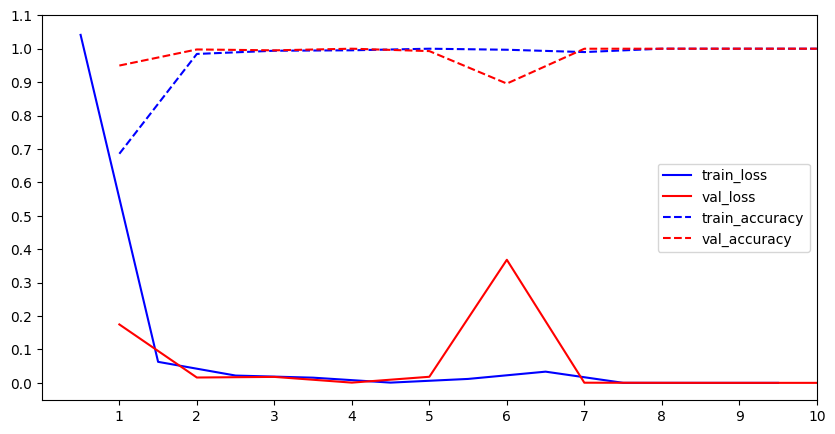

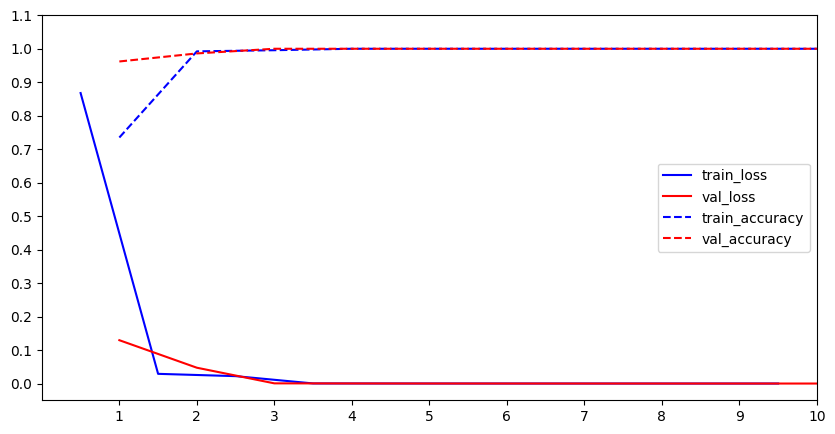

In [65]:
h_2_3 = np.load('models/experiment-fmaps-3-history', allow_pickle=True)
h = np.load('models/experiment-filters-1-history', allow_pickle=True)
get_train_val_plots(h, yticks=np.arange(0, 1.2, 0.1))
get_train_val_plots(h_2_3, yticks=np.arange(0, 1.2, 0.1))

We choose to use filter sizes of (5x5)

## Dropout

In [66]:
# Models
# 'models/experiment-dropout-0'
# 'models/experiment-dropout-1'
# 'models/experiment-dropout-2'

# History objects
# 'models/experiment-dropout-0-history'
# 'models/experiment-dropout-1-history'
# 'models/experiment-dropout-2-history'

early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

dropout_rates = [0.3, 0.4, 0.5]

for index, i in enumerate(dropout_rates):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(24, (5, 5), padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(i))
    model.add(keras.layers.Conv2D(48, (5, 5), padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(i))
    model.add(keras.layers.Conv2D(96, (5, 5), padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(i))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dropout(i))
    model.add(keras.layers.Dense(24, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    save_best_cb = keras.callbacks.ModelCheckpoint(f'models/experiment-dropout-{index}', save_best_only=True)
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])
    with open(f'models/experiment-dropout-{index}-history', 'wb') as history_file:
        pickle.dump(history.history, history_file)

Epoch 1/10
607/610 [============================>.] - ETA: 0s - loss: 1.8031 - accuracy: 0.4337INFO:tensorflow:Assets written to: models/experiment-dropout-0/assets


INFO:tensorflow:Assets written to: models/experiment-dropout-0/assets


610/610 [==============================] - 12s 20ms/step - loss: 1.7986 - accuracy: 0.4353 - val_loss: 0.2887 - val_accuracy: 0.9195
Epoch 2/10
607/610 [============================>.] - ETA: 0s - loss: 0.3531 - accuracy: 0.8790INFO:tensorflow:Assets written to: models/experiment-dropout-0/assets


INFO:tensorflow:Assets written to: models/experiment-dropout-0/assets


610/610 [==============================] - 12s 19ms/step - loss: 0.3524 - accuracy: 0.8792 - val_loss: 0.0403 - val_accuracy: 0.9943
Epoch 3/10
608/610 [============================>.] - ETA: 0s - loss: 0.1587 - accuracy: 0.9480INFO:tensorflow:Assets written to: models/experiment-dropout-0/assets


INFO:tensorflow:Assets written to: models/experiment-dropout-0/assets


610/610 [==============================] - 12s 19ms/step - loss: 0.1586 - accuracy: 0.9479 - val_loss: 0.0081 - val_accuracy: 0.9994
Epoch 4/10
610/610 [==============================] - ETA: 0s - loss: 0.1007 - accuracy: 0.9659INFO:tensorflow:Assets written to: models/experiment-dropout-0/assets


INFO:tensorflow:Assets written to: models/experiment-dropout-0/assets


610/610 [==============================] - 12s 19ms/step - loss: 0.1007 - accuracy: 0.9659 - val_loss: 0.0046 - val_accuracy: 0.9999
Epoch 5/10
610/610 [==============================] - ETA: 0s - loss: 0.0690 - accuracy: 0.9772INFO:tensorflow:Assets written to: models/experiment-dropout-0/assets


INFO:tensorflow:Assets written to: models/experiment-dropout-0/assets


610/610 [==============================] - 12s 19ms/step - loss: 0.0690 - accuracy: 0.9772 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 6/10
610/610 [==============================] - 12s 19ms/step - loss: 0.0627 - accuracy: 0.9791 - val_loss: 0.0020 - val_accuracy: 0.9997
Epoch 7/10
608/610 [============================>.] - ETA: 0s - loss: 0.0491 - accuracy: 0.9841INFO:tensorflow:Assets written to: models/experiment-dropout-0/assets


INFO:tensorflow:Assets written to: models/experiment-dropout-0/assets


610/610 [==============================] - 12s 20ms/step - loss: 0.0490 - accuracy: 0.9841 - val_loss: 2.2687e-04 - val_accuracy: 1.0000
Epoch 8/10
610/610 [==============================] - 12s 19ms/step - loss: 0.0448 - accuracy: 0.9844 - val_loss: 2.5513e-04 - val_accuracy: 1.0000
Epoch 9/10
610/610 [==============================] - 12s 20ms/step - loss: 0.0476 - accuracy: 0.9847 - val_loss: 3.5683e-04 - val_accuracy: 1.0000
Epoch 10/10
610/610 [==============================] - 12s 20ms/step - loss: 0.0458 - accuracy: 0.9853 - val_loss: 0.0012 - val_accuracy: 0.9992
Epoch 1/10
608/610 [============================>.] - ETA: 0s - loss: 2.2182 - accuracy: 0.3071INFO:tensorflow:Assets written to: models/experiment-dropout-1/assets


INFO:tensorflow:Assets written to: models/experiment-dropout-1/assets


610/610 [==============================] - 13s 21ms/step - loss: 2.2158 - accuracy: 0.3077 - val_loss: 0.6575 - val_accuracy: 0.8057
Epoch 2/10
607/610 [============================>.] - ETA: 0s - loss: 0.7501 - accuracy: 0.7420INFO:tensorflow:Assets written to: models/experiment-dropout-1/assets


INFO:tensorflow:Assets written to: models/experiment-dropout-1/assets


610/610 [==============================] - 13s 21ms/step - loss: 0.7496 - accuracy: 0.7420 - val_loss: 0.1891 - val_accuracy: 0.9545
Epoch 3/10
608/610 [============================>.] - ETA: 0s - loss: 0.3915 - accuracy: 0.8630INFO:tensorflow:Assets written to: models/experiment-dropout-1/assets


INFO:tensorflow:Assets written to: models/experiment-dropout-1/assets


610/610 [==============================] - 13s 21ms/step - loss: 0.3915 - accuracy: 0.8631 - val_loss: 0.0548 - val_accuracy: 0.9922
Epoch 4/10
609/610 [============================>.] - ETA: 0s - loss: 0.2648 - accuracy: 0.9119INFO:tensorflow:Assets written to: models/experiment-dropout-1/assets


INFO:tensorflow:Assets written to: models/experiment-dropout-1/assets


610/610 [==============================] - 13s 21ms/step - loss: 0.2648 - accuracy: 0.9119 - val_loss: 0.0293 - val_accuracy: 0.9966
Epoch 5/10
610/610 [==============================] - ETA: 0s - loss: 0.1930 - accuracy: 0.9345INFO:tensorflow:Assets written to: models/experiment-dropout-1/assets


INFO:tensorflow:Assets written to: models/experiment-dropout-1/assets


610/610 [==============================] - 14s 22ms/step - loss: 0.1930 - accuracy: 0.9345 - val_loss: 0.0135 - val_accuracy: 0.9996
Epoch 6/10
609/610 [============================>.] - ETA: 0s - loss: 0.1563 - accuracy: 0.9465INFO:tensorflow:Assets written to: models/experiment-dropout-1/assets


INFO:tensorflow:Assets written to: models/experiment-dropout-1/assets


610/610 [==============================] - 13s 22ms/step - loss: 0.1562 - accuracy: 0.9465 - val_loss: 0.0088 - val_accuracy: 1.0000
Epoch 7/10
607/610 [============================>.] - ETA: 0s - loss: 0.1315 - accuracy: 0.9563INFO:tensorflow:Assets written to: models/experiment-dropout-1/assets


INFO:tensorflow:Assets written to: models/experiment-dropout-1/assets


610/610 [==============================] - 13s 21ms/step - loss: 0.1318 - accuracy: 0.9562 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 8/10
607/610 [============================>.] - ETA: 0s - loss: 0.1141 - accuracy: 0.9619INFO:tensorflow:Assets written to: models/experiment-dropout-1/assets


INFO:tensorflow:Assets written to: models/experiment-dropout-1/assets


610/610 [==============================] - 13s 22ms/step - loss: 0.1140 - accuracy: 0.9619 - val_loss: 0.0025 - val_accuracy: 0.9999
Epoch 9/10
609/610 [============================>.] - ETA: 0s - loss: 0.1012 - accuracy: 0.9652INFO:tensorflow:Assets written to: models/experiment-dropout-1/assets


INFO:tensorflow:Assets written to: models/experiment-dropout-1/assets


610/610 [==============================] - 13s 21ms/step - loss: 0.1012 - accuracy: 0.9652 - val_loss: 0.0016 - val_accuracy: 0.9997
Epoch 10/10
607/610 [============================>.] - ETA: 0s - loss: 0.0933 - accuracy: 0.9693INFO:tensorflow:Assets written to: models/experiment-dropout-1/assets


INFO:tensorflow:Assets written to: models/experiment-dropout-1/assets


610/610 [==============================] - 13s 22ms/step - loss: 0.0932 - accuracy: 0.9692 - val_loss: 5.7994e-04 - val_accuracy: 1.0000
Epoch 1/10
608/610 [============================>.] - ETA: 0s - loss: 2.7086 - accuracy: 0.1675INFO:tensorflow:Assets written to: models/experiment-dropout-2/assets


INFO:tensorflow:Assets written to: models/experiment-dropout-2/assets


610/610 [==============================] - 13s 21ms/step - loss: 2.7066 - accuracy: 0.1678 - val_loss: 1.2653 - val_accuracy: 0.6582
Epoch 2/10
609/610 [============================>.] - ETA: 0s - loss: 1.2476 - accuracy: 0.5729INFO:tensorflow:Assets written to: models/experiment-dropout-2/assets


INFO:tensorflow:Assets written to: models/experiment-dropout-2/assets


610/610 [==============================] - 12s 20ms/step - loss: 1.2475 - accuracy: 0.5730 - val_loss: 0.4795 - val_accuracy: 0.8931
Epoch 3/10
607/610 [============================>.] - ETA: 0s - loss: 0.7283 - accuracy: 0.7449INFO:tensorflow:Assets written to: models/experiment-dropout-2/assets


INFO:tensorflow:Assets written to: models/experiment-dropout-2/assets


610/610 [==============================] - 13s 21ms/step - loss: 0.7274 - accuracy: 0.7451 - val_loss: 0.2070 - val_accuracy: 0.9534
Epoch 4/10
609/610 [============================>.] - ETA: 0s - loss: 0.5227 - accuracy: 0.8200INFO:tensorflow:Assets written to: models/experiment-dropout-2/assets


INFO:tensorflow:Assets written to: models/experiment-dropout-2/assets


610/610 [==============================] - 13s 21ms/step - loss: 0.5226 - accuracy: 0.8199 - val_loss: 0.1019 - val_accuracy: 0.9879
Epoch 5/10
607/610 [============================>.] - ETA: 0s - loss: 0.4068 - accuracy: 0.8613INFO:tensorflow:Assets written to: models/experiment-dropout-2/assets


INFO:tensorflow:Assets written to: models/experiment-dropout-2/assets


610/610 [==============================] - 13s 22ms/step - loss: 0.4071 - accuracy: 0.8613 - val_loss: 0.0585 - val_accuracy: 0.9956
Epoch 6/10
609/610 [============================>.] - ETA: 0s - loss: 0.3390 - accuracy: 0.8839INFO:tensorflow:Assets written to: models/experiment-dropout-2/assets


INFO:tensorflow:Assets written to: models/experiment-dropout-2/assets


610/610 [==============================] - 13s 21ms/step - loss: 0.3390 - accuracy: 0.8838 - val_loss: 0.0549 - val_accuracy: 0.9926
Epoch 7/10
608/610 [============================>.] - ETA: 0s - loss: 0.2947 - accuracy: 0.9003INFO:tensorflow:Assets written to: models/experiment-dropout-2/assets


INFO:tensorflow:Assets written to: models/experiment-dropout-2/assets


610/610 [==============================] - 12s 20ms/step - loss: 0.2949 - accuracy: 0.9002 - val_loss: 0.0280 - val_accuracy: 0.9977
Epoch 8/10
607/610 [============================>.] - ETA: 0s - loss: 0.2675 - accuracy: 0.9071INFO:tensorflow:Assets written to: models/experiment-dropout-2/assets


INFO:tensorflow:Assets written to: models/experiment-dropout-2/assets


610/610 [==============================] - 13s 21ms/step - loss: 0.2671 - accuracy: 0.9072 - val_loss: 0.0165 - val_accuracy: 0.9982
Epoch 9/10
608/610 [============================>.] - ETA: 0s - loss: 0.2487 - accuracy: 0.9176INFO:tensorflow:Assets written to: models/experiment-dropout-2/assets


INFO:tensorflow:Assets written to: models/experiment-dropout-2/assets


610/610 [==============================] - 12s 20ms/step - loss: 0.2489 - accuracy: 0.9174 - val_loss: 0.0128 - val_accuracy: 0.9990
Epoch 10/10
610/610 [==============================] - ETA: 0s - loss: 0.2336 - accuracy: 0.9213INFO:tensorflow:Assets written to: models/experiment-dropout-2/assets


INFO:tensorflow:Assets written to: models/experiment-dropout-2/assets


610/610 [==============================] - 12s 19ms/step - loss: 0.2336 - accuracy: 0.9213 - val_loss: 0.0116 - val_accuracy: 0.9994


In [67]:
for index in range(3):
    model = keras.models.load_model(f'models/experiment-dropout-{index}')
    model.evaluate(X_valid, y_valid)

249/249 [==============================] - 1s 4ms/step - loss: 0.0116 - accuracy: 0.9994


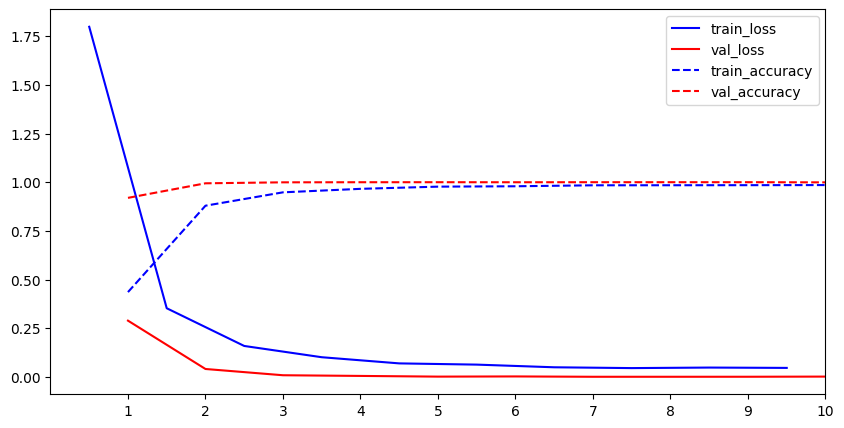

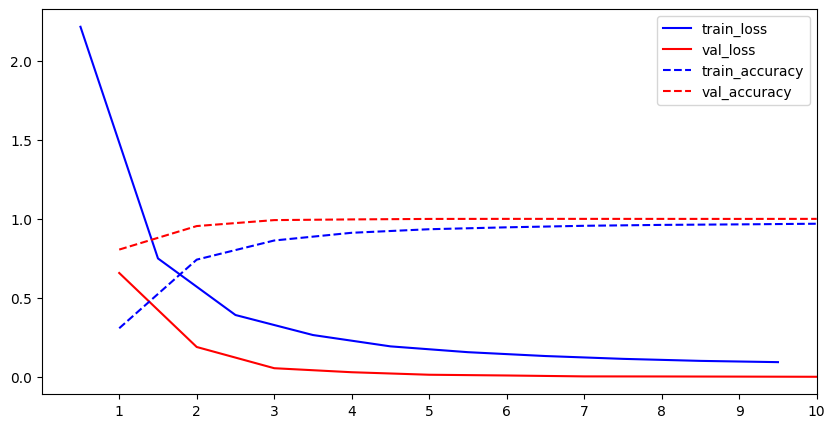

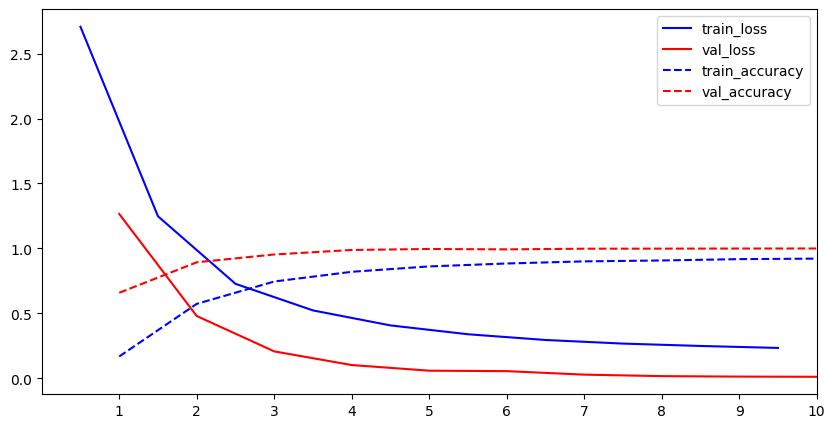

In [68]:
h_0 = np.load('models/experiment-dropout-0-history', allow_pickle=True)
h_1 = np.load('models/experiment-dropout-1-history', allow_pickle=True)
h_2 = np.load('models/experiment-dropout-2-history', allow_pickle=True)

get_train_val_plots(h_0)
get_train_val_plots(h_1)
get_train_val_plots(h_2)

Select Model 1

## Data Augmentation

In [69]:
# Sample Code

data_augmentation = keras.models.Sequential()
data_augmentation.add(keras.layers.RandomRotation(0.1, fill_mode='nearest', input_shape=(28, 28, 1)))
data_augmentation.add(keras.layers.RandomZoom((0.15, 0.2), fill_mode='nearest'))
data_augmentation.add(keras.layers.RandomTranslation(0.1, 0.1, fill_mode='nearest'))

model = keras.models.Sequential()
# Add the layers from the above model

Improves the models performance by decreasing the tendency to overfit

## Other Hyperparameters to try

1. Batch Normalization - It normalizes the layer inputs
2. Deeper networks work well - Replacing the single convolution layer of filter size (5X5) with two successive consecutive convolution layers of filter size (3X3)
3. Number of units in the dense layer and number of dense layers
4. Replacing the MaxPooling Layer with a convolution layer having a stride > 1
5. Optimizers
6. Learning rate of the optimizer

## Visualising the final model

In [72]:
best_model = keras.models.load_model('models/experiment-dropout-0/')
plot_model(best_model, to_file='model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


# Performance on the Test Set

In [73]:
test_df = pd.read_csv('data/alphabet/sign_mnist_test.csv')
X_test, y_test = test_df.drop('label', axis=1), test_df['label']

In [74]:
best_model = keras.models.load_model('models/experiment-dropout-0/')

In [75]:
evaluate_model(best_model, X_test, y_test, label_binarizer)

225/225 [==============================] - 1s 4ms/step - loss: 12.9682 - accuracy: 0.9700
Loss: 12.968 Accuracy: 0.970


Accuracy: 96%

In [76]:
test_df = pd.read_csv('data/alphabet/sign_mnist_test.csv')
X_test, y_test = test_df.drop('label', axis=1), test_df['label']

In [77]:
# Applying normalisation which is applied for X_train
X_test /= 255.0

In [78]:
best_model = keras.models.load_model('models/experiment-dropout-0/')

In [79]:
evaluate_model(best_model, X_test, y_test, label_binarizer)

225/225 [==============================] - 1s 4ms/step - loss: 0.0678 - accuracy: 0.9773
Loss: 0.068 Accuracy: 0.977


In [82]:
pip install streamlit

  Using cached streamlit-1.22.0-py2.py3-none-any.whl (8.9 MB)
  Using cached altair-4.2.2-py3-none-any.whl (813 kB)
  Using cached blinker-1.6.2-py3-none-any.whl (13 kB)
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
  Using cached importlib_metadata-6.6.0-py3-none-any.whl (22 kB)
  Using cached protobuf-3.20.3-py2.py3-none-any.whl (162 kB)
  Using cached pyarrow-12.0.0-cp311-cp311-macosx_11_0_arm64.whl (22.6 MB)
  Using cached Pympler-1.0.1-py3-none-any.whl (164 kB)
  Using cached rich-13.3.5-py3-none-any.whl (238 kB)
  Using cached tenacity-8.2.2-py3-none-any.whl (24 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl (16 kB)
  Using cached tzlocal-5.0.1-py3-none-any.whl (20 kB)
  Using cached validators-0.20.0-py3-none-any.whl
  Using cached GitPython-3.1.31-py3-none-any.whl (184 kB)
  Using cached pydeck-0.8.1b0-py2.py3-none-any.whl (4.8 MB)
  Using cached toolz-0.12.0-py3-none-any.whl (55 kB)
  Using cached gitdb-4.0.10-py3-none-any.whl (62 kB)
  Using cached zipp-3.15.0-py3-

Accuracy: 96%

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/02/_2kdmy013rsdzbkv_6m67v1c0000gn/T/ipykernel_34203/3218963428.py", line 7, in <module>
    import streamlit as st
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/streamlit/__init__.py", line 55, in <module>
    from streamlit.delta_generator import DeltaGenerator as _DeltaGenerator
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/streamlit/delta_generator.py", line 36, in <module>
    from streamlit import config, cursor, env_util, logger, runtime, type_util, util
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/streamlit/cursor.py", line 18, in <module>
    from streamlit.runtime.scriptrunner import get_script_run_ct